## Singular-Value Decomposition:

# Calculate Singular-Value Decomposition


In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
# Singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print("A:", A)
print('\n>>>>')
# SVD
U, s, VT = svd(A)
print("U:", U)
print('\n>>>>')
print("sigma:", s)
print('\n>>>>')
print("V^T:", VT)

A: [[1 2]
 [3 4]
 [5 6]]

>>>>
U: [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]

>>>>
sigma: [9.52551809 0.51430058]

>>>>
V^T: [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


# Reconstruct Matrix from SVD


In [3]:
## https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

In [4]:
# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
print('\n>>>>')
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print('\n>>>>')
print(B)

[[1 2]
 [3 4]
 [5 6]]

>>>>

>>>>
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [5]:
# %load_ext autoreload
# %autoreload 2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# import sys; sys.path.append('../')
from utilities import *
# from spectrum import *
# # from sph_harm import *
from gof import *
from numpy.linalg import svd

# Calculate Singular-Value Decomposition


In [6]:
def svdecom(data):
    t1 = time.time()
    data = np.nan_to_num(data)
    nchan = data.shape[0]
    U = np.zeros((2,2,nchan,nchan), dtype='complex')
    S = np.zeros((2,2,nchan), dtype='complex')
    npix = data.shape[3]*data.shape[4]
    V = np.zeros((2,2,nchan,npix), dtype='complex')
    for i in range(2):
        for j in range(2):
            print(i,j) 
            data2d = np.zeros((nchan,npix), dtype='complex')
            for k in range(nchan):
                data2d[k,:] = data[k,i,j,:,:].ravel()
            (u,s,v) = svd(data2d, full_matrices=False)
            U[i,j,:,:], S[i,j,:], V[i,j,:,:] = u,s,v
    t2 = time.time()
    print ("-- Time taken = %.2f minutes"%((t2-t1)/60.))
    return U,S,V

#sb = ([960,1125], [1305,1463])
#f1, f2 = freq_to_idx(nu, sb[0])
#x,y, c, px = 0,0, dataC.shape[-1]/2, 40
#dat = np.nan_to_num(dataC[:,:,f1:f2,c-px:c+px,c-px:c+px])

# gdata = u
# print gdata.shape

# U,S,V = svdecom(gdata)
# print U.shape, S.shape, V.shape

# Reconstruct Beam from SVD

In [7]:
def svdrecon(data,U,S,V,thresh):
    data = np.nan_to_num(data)
    nchan = data.shape[0]
    model = np.zeros(data.shape, dtype='complex')
    W = np.zeros((2,2,nchan,nchan), dtype='complex')
    mse = np.zeros((2,2))
    for i in range(2):
        for j in range(2):
            w = np.dot(U[i,j,:,:],np.diag(S[i,j,:]))
            W[i,j,:,:] = w
            recon = np.dot(w[:,:thresh],V[i,j,:thresh,:])
            dat = data[:,i,j,:,:]
            mod = recon.reshape(dat.shape)
            model[:,i,j,:,:] = mod
            mse[i,j] = abs(np.sqrt(np.mean((dat-mod)**2))/np.mean(dat))
    return model, mse, W


In [8]:
# ant1GxRe.fits

In [35]:
l =  3.0e8/(1000e6)
l

0.3

In [37]:
np.rad2deg(1.02*l/12)

1.4610423775835992

In [34]:
180.0/50

3.6

In [9]:
# !ls /net/jake/home/narh/KAT7-holography-beams/holog/

In [10]:
def testoskarbeam(path, antnum=1):
    
    XX_re = fits.open('%s' %os.path.join(path, 'ant%iGxRe.fits' %antnum))[0].data
    XX_im = fits.open('%s' %os.path.join(path, 'ant%iGxIm.fits' %antnum))[0].data
    XY_re = fits.open('%s' %os.path.join(path, 'ant%iGyRe.fits' %antnum))[0].data
    XY_im = fits.open('%s' %os.path.join(path, 'ant%iGyIm.fits' %antnum))[0].data
    YX_re = fits.open('%s' %os.path.join(path, 'ant%iDxRe.fits' %antnum))[0].data
    YX_im = fits.open('%s' %os.path.join(path, 'ant%iDxIm.fits' %antnum))[0].data
    YY_re = fits.open('%s' %os.path.join(path, 'ant%iDyRe.fits' %antnum))[0].data
    YY_im = fits.open('%s' %os.path.join(path, 'ant%iDyIm.fits' %antnum))[0].data
    
    emap = []
    emap.append([XX_re + 1j*XX_im, XY_re + 1j*XY_im])  
    emap.append([YX_re + 1j*YX_im, YY_re + 1j*YY_im])
    
    s = np.array(emap)  

    s = np.swapaxes(s, axis1=2, axis2=0)
    
    
    return  s 

In [40]:
import sys
sys.path.insert(0, '/home/tan/Documents/GSSTI/JGSA/')

import primary_beam_denoising_pipeline as pb

def loadbeam(path, antnum=1):
    
    XX_re = fits.open('%s' %os.path.join(path, 'ant%iGxRe.fits' %antnum))[0].data
    XX_im = fits.open('%s' %os.path.join(path, 'ant%iGxIm.fits' %antnum))[0].data
    XY_re = fits.open('%s' %os.path.join(path, 'ant%iGyRe.fits' %antnum))[0].data
    XY_im = fits.open('%s' %os.path.join(path, 'ant%iGyIm.fits' %antnum))[0].data
    YX_re = fits.open('%s' %os.path.join(path, 'ant%iDxRe.fits' %antnum))[0].data
    YX_im = fits.open('%s' %os.path.join(path, 'ant%iDxIm.fits' %antnum))[0].data
    YY_re = fits.open('%s' %os.path.join(path, 'ant%iDyRe.fits' %antnum))[0].data
    YY_im = fits.open('%s' %os.path.join(path, 'ant%iDyIm.fits' %antnum))[0].data
    
    emap = []
    emap.append([XX_re + 1j*XX_im, XY_re + 1j*XY_im])  
    emap.append([YX_re + 1j*YX_im, YY_re + 1j*YY_im])
    
    s = np.array(emap)  

    s = np.swapaxes(s, axis1=2, axis2=0)    
    
    return  s 

path = '/home/tan/Documents/GSSTI/holog'

gdata = loadbeam(path, antnum=6)


In [48]:
K = pb.Singular_Value_Decompostion(gdata)

In [52]:
D = K.svdecom()

0 0
0 1
1 0
1 1
-- Time taken = 0.07 minutes


In [59]:
reco, err, w = K.svdrecon(thresh=1)

0 0
0 1
1 0
1 1
-- Time taken = 0.03 minutes


In [61]:
%load_ext autoreload
%autoreload 2
mse, recons, weights = [], [], []
thresh = range(1,5)
K = pb.Singular_Value_Decompostion(gdata)
for i,ii in enumerate(thresh):
    reco, err, w = K.svdrecon(thresh=ii)
    recons.append(reco)
    mse.append(err)
    weights.append(w)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 0
0 1
1 0
1 1
-- Time taken = 0.08 minutes
0 0
0 1
1 0
1 1
-- Time taken = 0.03 minutes
0 0
0 1
1 0
1 1
-- Time taken = 0.03 minutes
0 0
0 1
1 0
1 1
-- Time taken = 0.04 minutes


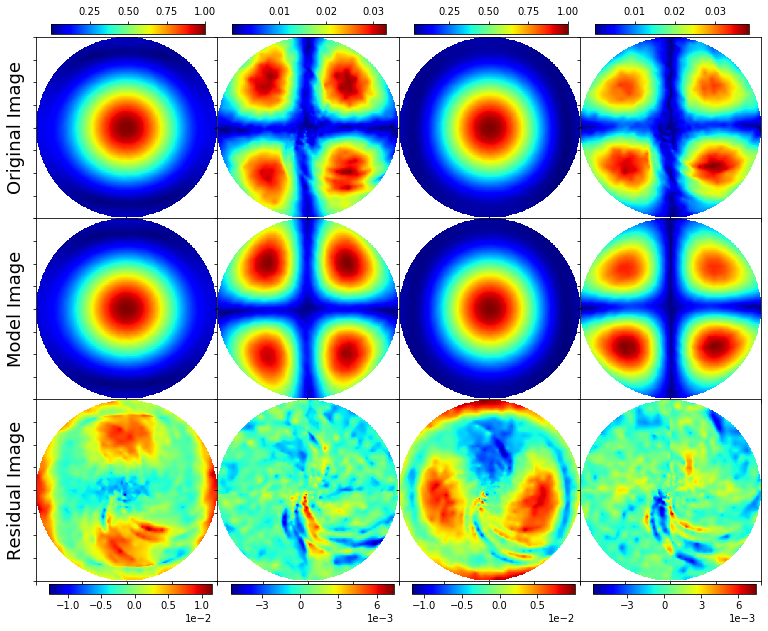

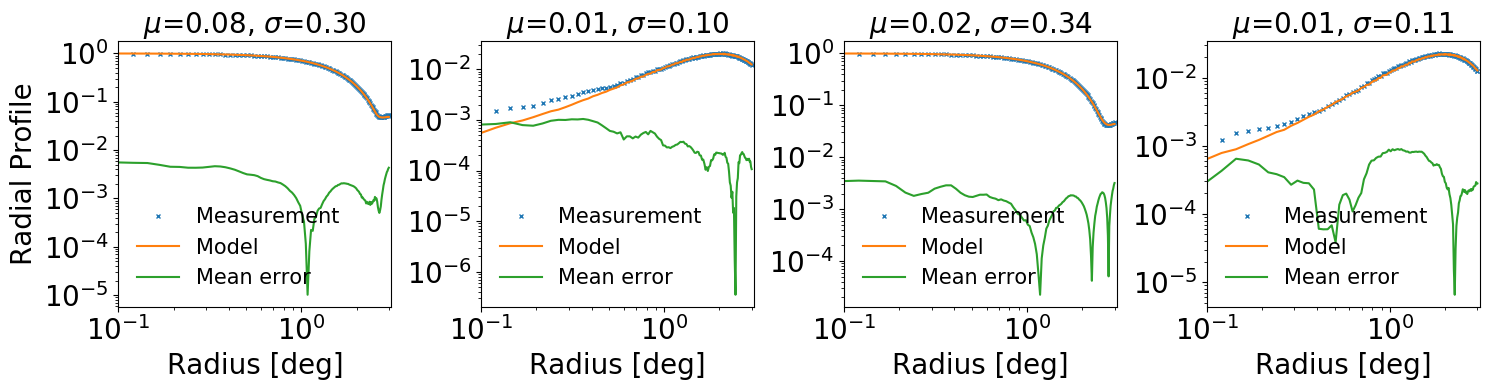

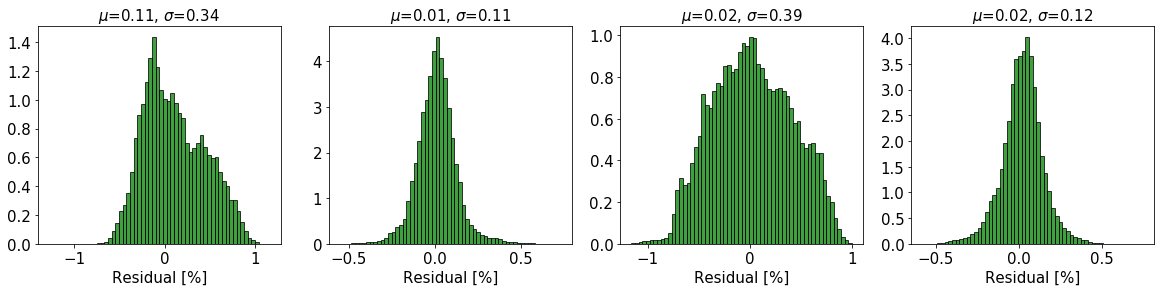

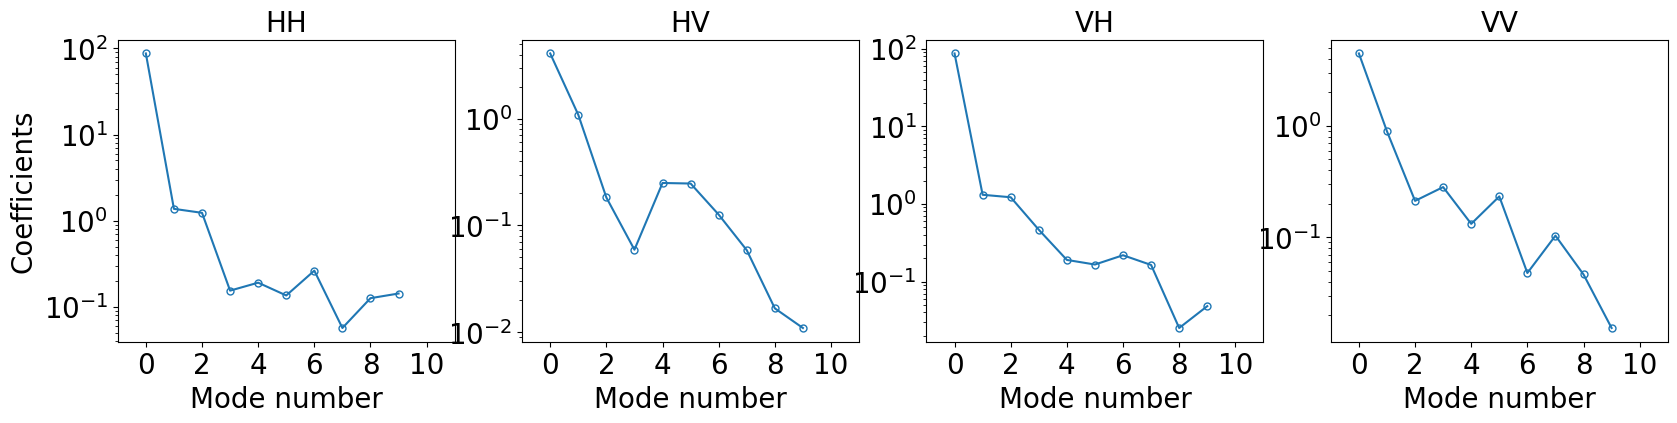

In [62]:
## Using 1 eigenvalue
ch = 10
egn =1
dat, mod = gdata[ch,:,:,:,:], recons[egn][ch,:,:,:,:]
coeffs = weights[0][:,:,:,:10]
# gof_plot(abs(dat), abs(mod), abs(coeffs[:,:,ch,:]), vrange=[-25,0, -30,-10], extent = [-1,1,-1,1])
from gof import *
gof_plot2(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])


In [ ]:
# gdata = m
print( gdata.shape)

U,S,V = svdecom(gdata)
print( U.shape, S.shape, V.shape)
#
mse, recons, weights = [], [], []
thresh = range(1,5)
for i,ii in enumerate(thresh):
#     print( ii,)
    reco, err, w = svdrecon(gdata,U,S,V,ii)
    recons.append(reco)
    mse.append(err)
    weights.append(w)


## Using 1 eigenvalue
ch = 10
egn =1
dat, mod = gdata[ch,:,:,:,:], recons[egn][ch,:,:,:,:]
coeffs = weights[0][:,:,:,:10]
# gof_plot(abs(dat), abs(mod), abs(coeffs[:,:,ch,:]), vrange=[-25,0, -30,-10], extent = [-1,1,-1,1])
from gof import *
gof_plot2(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])


In [11]:
path = '/home/tan/Documents/GSSTI/holog'
# '/net/jake/home/narh/KAT7-holography-beams/holog/'

In [12]:
m = testoskarbeam(path, antnum=6)

print(  m.shape)


(20, 2, 2, 256, 256)


In [13]:
def radial_profiles(data, model, extent=3, view=True):
	residual = abs(data)-abs(model)
	N = int(data.shape[-1]/2-2)
	x = np.linspace(0,extent, N)
	fig, ax = plt.subplots(1,4, figsize=(15,4), dpi=100)
	c = 0
	for i in range(2):
		for j in range(2):
			res = residual[i,j,...]
			res = np.nan_to_num(res)
			mu, sig = np.mean(res)*1e2, np.std(res)*1e2 ;print(N)
			ax[c].loglog(x, abs(radial_profile_x(data[i,j,...])[:N]), 'x', markersize=3, label='Measurement')
			ax[c].loglog(x, abs(radial_profile_x(model[i,j,...])[:N]), '-', label='Model')
			ax[c].loglog(x, abs(radial_profile_x(res)[:N]), '-', label='Mean error')
			leg = ax[c].legend(loc='best', fontsize=15)
			leg.get_frame().set_facecolor('none')
			leg.get_frame().set_linewidth('0.')
			if i == 0 and j == 0:
				ax[c].set_ylabel('Radial Profile', fontsize=20)
			ax[c].set_xlabel('Radius [deg]', fontsize=20)
			ax[c].set_title("$\\mu$=%.2f, $\\sigma$=%.2f"%(mu,sig), fontsize=20)
			for tick in ax[c].xaxis.get_major_ticks(): tick.label.set_fontsize(20) 
			for tick in ax[c].yaxis.get_major_ticks(): tick.label.set_fontsize(20)
#            ax[c].locator_params(nbins=4, axis='y')
			ax[c].set_xlim([1e-1,3.1])
#            if i==j: ax[c].set_ylim([1e-5,1.0])
#            if i!=j: ax[c].set_ylim([1e-5,1.0])
			c+=1
	plt.subplots_adjust(wspace=0.2, hspace=0.05)
	fig.tight_layout()
	if view==True: plt.show()
	plt.close()

126
126
126
126


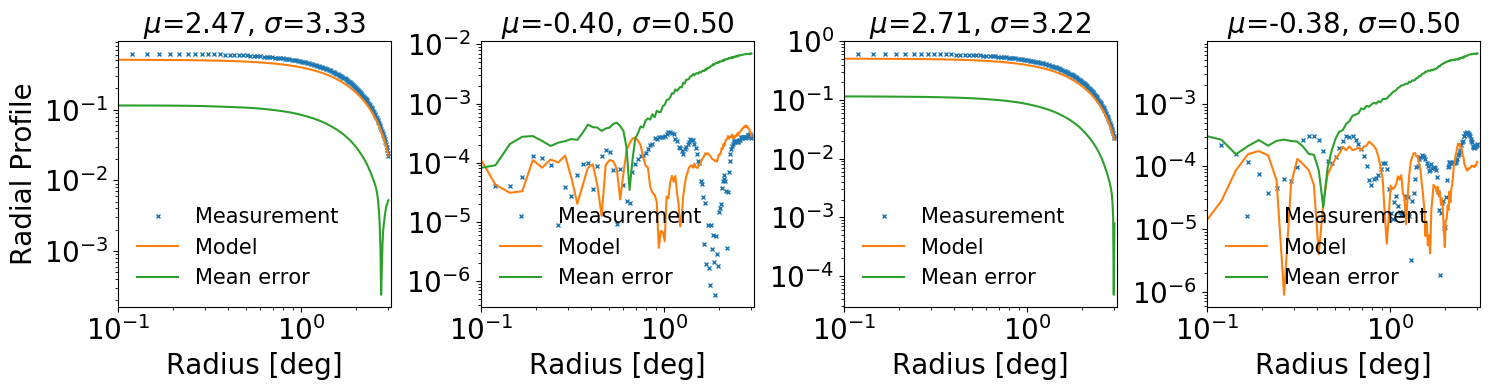

In [14]:
radial_profiles(data= m[0,...].real, model=m[1,...].real, extent=3, view=True)

In [15]:
antnum=1
fits.open('%s' %os.path.join(path, 'ant%iGxRe.fits' %antnum))[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  256                                                  
NAXIS2  =                  256                                                  
NAXIS3  =                   20                                                  
BUNIT   = ''                                                                    
CRVAL1  =                    0                                                  
CRVAL2  =                    0                                                  
CRVAL3  =                 1300                                                  
CRPIX1  =                127.0                                                  
CRPIX2  =                127.0                                                  
CRPIX3  =                   

In [16]:
gdata = m
print( gdata.shape)

U,S,V = svdecom(gdata)
print( U.shape, S.shape, V.shape)
#
mse, recons, weights = [], [], []
thresh = range(1,5)
for i,ii in enumerate(thresh):
#     print( ii,)
    reco, err, w = svdrecon(gdata,U,S,V,ii)
    recons.append(reco)
    mse.append(err)
    weights.append(w)


(20, 2, 2, 256, 256)
0 0
0 1
1 0
1 1
-- Time taken = 0.04 minutes
(2, 2, 20, 20) (2, 2, 20) (2, 2, 20, 65536)


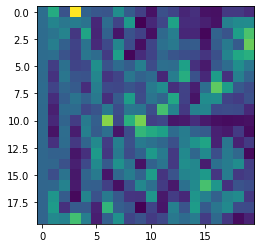

In [17]:
plt.imshow(abs(U[0,0,...]))

In [18]:
# s = np.dot(abs(U[0,0,...]), np.dot(np.diag(abs(S[0,0,...]), abs(V[0,0,...])))
           
s = np.dot(abs(U[0,0,...]), np.dot(np.diag(abs(S[0,0,...])), abs(V[0,0,...])))

s.shape

(20, 65536)

In [21]:
S.shape

(2, 2, 20)

In [39]:
# np.diag(abs(S[0,0])).shape

# s1 = np.diag(abs(S[0,0]))

In [19]:
np.diagonal(abs(S[0,0,...]))

ValueError: diag requires an array of at least two dimensions

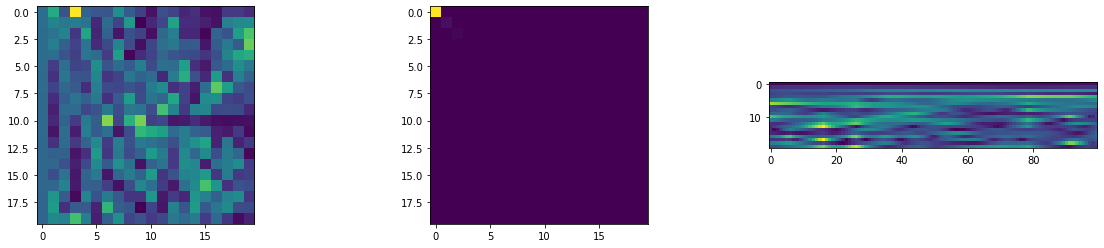

In [24]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
ax[0].imshow(abs(U[0,0,...]))
ax[1].imshow(np.diag(abs(S[0,0,])))
ax[2].imshow(abs(V[0,0,:, :100]))

In [ ]:
# abs(coeffs[:,:,ch,:])

In [ ]:
## Using 1 eigenvalue
ch = 0
egn =1
dat, mod = gdata[ch,:,:,:,:], recons[egn][ch,:,:,:,:]
coeffs = weights[0][:,:,:,:10]
# gof_plot(abs(dat), abs(mod), abs(coeffs[:,:,ch,:]), vrange=[-25,0, -30,-10], extent = [-1,1,-1,1])
from gof import *
gof_plot2(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])
# from zernike import *
# gof_plot1(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])

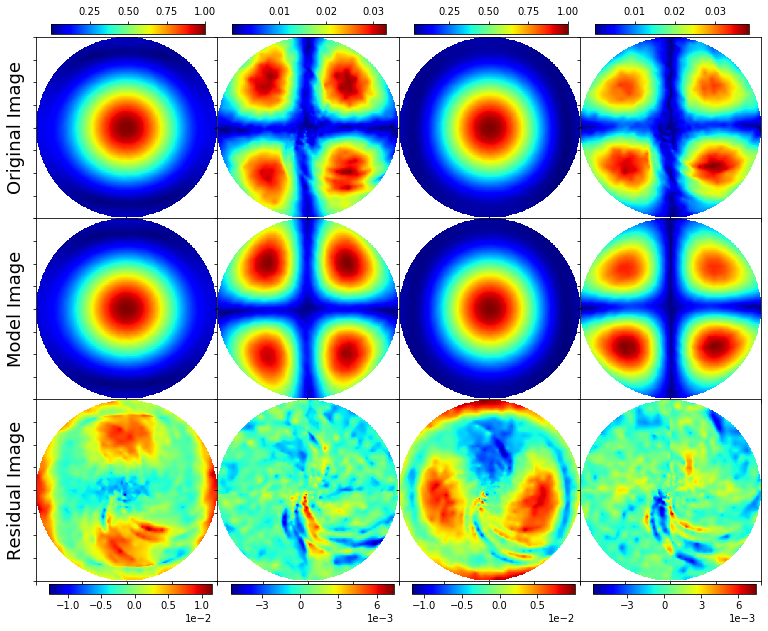

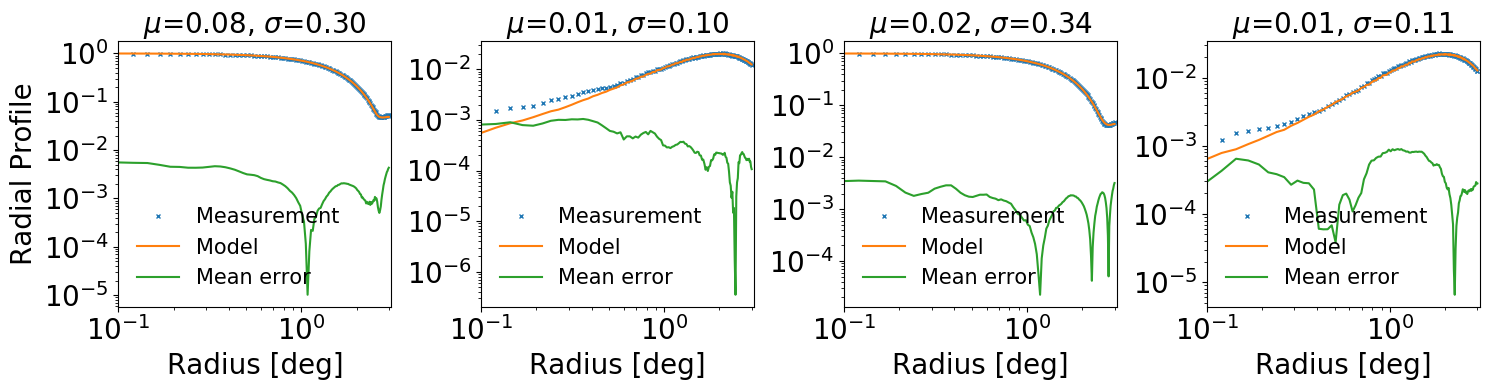

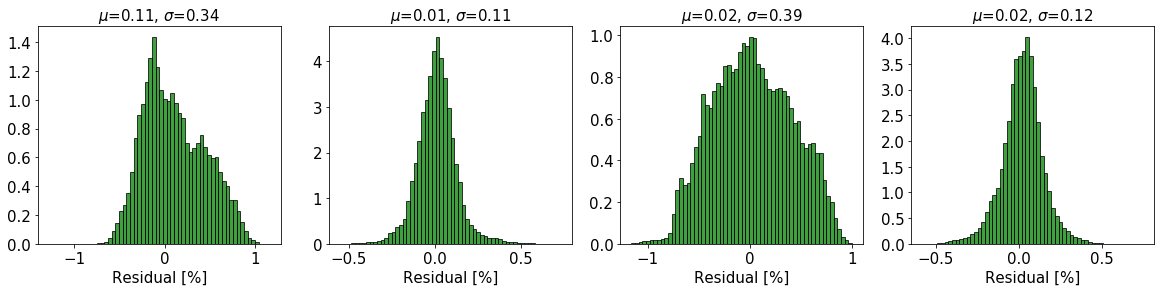

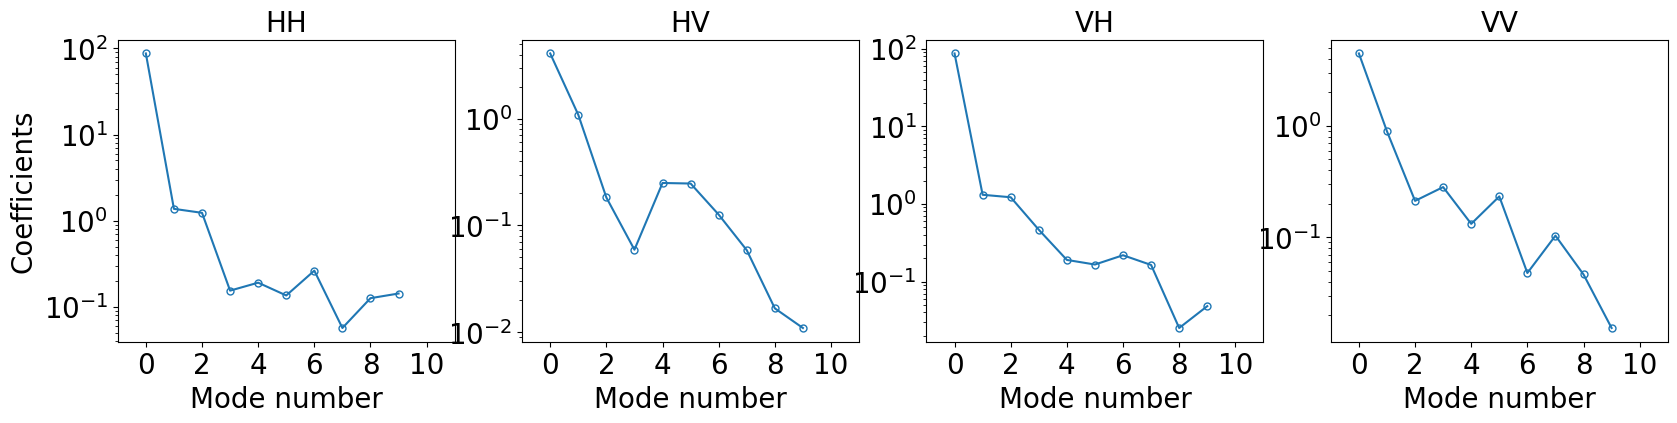

In [38]:
## Using 1 eigenvalue
ch = 10
egn =1
dat, mod = gdata[ch,:,:,:,:], recons[egn][ch,:,:,:,:]
coeffs = weights[0][:,:,:,:10]
# gof_plot(abs(dat), abs(mod), abs(coeffs[:,:,ch,:]), vrange=[-25,0, -30,-10], extent = [-1,1,-1,1])
from gof import *
gof_plot2(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])
# from zernike import *
# gof_plot1(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])

In [ ]:
## Using 1 eigenvalue
ch = 19
egn =1
dat, mod = gdata[ch,:,:,:,:], recons[egn][ch,:,:,:,:]
coeffs = weights[0][:,:,:,:10]
# gof_plot(abs(dat), abs(mod), abs(coeffs[:,:,ch,:]), vrange=[-25,0, -30,-10], extent = [-1,1,-1,1])
from gof import *
gof_plot2(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])
# from zernike import *
# gof_plot1(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])

In [63]:
def plot_2Dslice(jns_beam, beamsize=6.):
    """
    Generates 1D profile of Jones beams in (2,2,N,N) format
    ** jns_beam:: Jones beams
    ** beamsize:: image size in degrees
    return::
      * Left & right diagonal plots
      * Horizontal & vertical plots
    """
    shp = jns_beam.shape[-1]
    fig = plt.figure(1, figsize=(25,10), dpi=100)
    n = 1
    x = np.linspace(-beamsize/2.,beamsize/2.,shp)
    ax = fig.add_subplot(1,2, n)
    ax.plot(x,jns_beam[0,0,...].diagonal(), linestyle='-', marker='o', label='XX Ldiag')
    ax.plot(x,np.rot90(jns_beam[0,0,...]).diagonal(), linestyle='-', marker='o', label='XX Rdiag')
    ax.plot(x,jns_beam[0,0,...][jns_beam[0,0,...].shape[-1]//2,:], label='XX H')
    print(True)
    ax.plot(x,jns_beam[0,0,...][:,jns_beam[0,0,...].shape[-1]//2], label='XX V')
    #ax.plot(x,yy_re[1].diagonal(), label='VV')
#     print(True)
    ax.plot(x,jns_beam[1,1,...].diagonal(), linestyle='-', marker='o', label='YY Ldiag')
    ax.plot(x,np.rot90(jns_beam[1,1,...]).diagonal(), linestyle='-', marker='o', label='YY Rdiag')
    ax.plot(x,jns_beam[1,1,...][jns_beam[1,1,...].shape[-1]//2,:], label='YY H')
    ax.plot(x,jns_beam[1,1,...][:,jns_beam[1,1,...].shape[-1]//2], label='YY V')
    ax.set_xlabel(r'$\theta$ [deg]', fontsize=22)
    ax.set_ylabel(r'Normalised Radiation Pattern', fontsize=22)
    ax.set_title(r' Co-polar',fontsize=20)
    ax.legend(loc=0, fontsize=22)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(25)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=5)
    
    n+=1
    

    ax = fig.add_subplot(1,2, n)
    ax.plot(x,jns_beam[0,1,...].diagonal(),linestyle='-', marker='o', label='XY Ldiag')
    ax.plot(x,np.rot90(jns_beam[0,1,...]).diagonal(), linestyle='-', marker='o', label='XY Rdiag')
    ax.plot(x,jns_beam[0,1,...][jns_beam[0,1,...].shape[-1]//2,:], label='XY H')
    ax.plot(x,jns_beam[0,1,...][:,jns_beam[0,1,...].shape[-1]//2], label='XY V')
#     ax.plot(x,yy_re[1].diagonal(), label='VV')
    ax.plot(x,jns_beam[1,0,...].diagonal(), linestyle='-', marker='o', label='YX Ldiag')
    ax.plot(x,np.rot90(jns_beam[1,0,...]).diagonal(), linestyle='-', marker='o', label='YX Rdiag')
    ax.plot(x,jns_beam[1,0,...][jns_beam[1,0,...].shape[-1]//2,:], label='YX H')
    ax.plot(x,jns_beam[1,0,...][:,jns_beam[1,0,...].shape[-1]//2], label='YX V')
    ax.set_xlabel(r'$\theta$ [deg]', fontsize=22)
    ax.set_ylabel(r'Normalised Radiation Pattern', fontsize=22)
    ax.set_title(r' Cross-polar',fontsize=22)
    ax.legend(loc=0, fontsize=20)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(25)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=5)
        
    plt.tight_layout()
    
    return None 